In [2]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

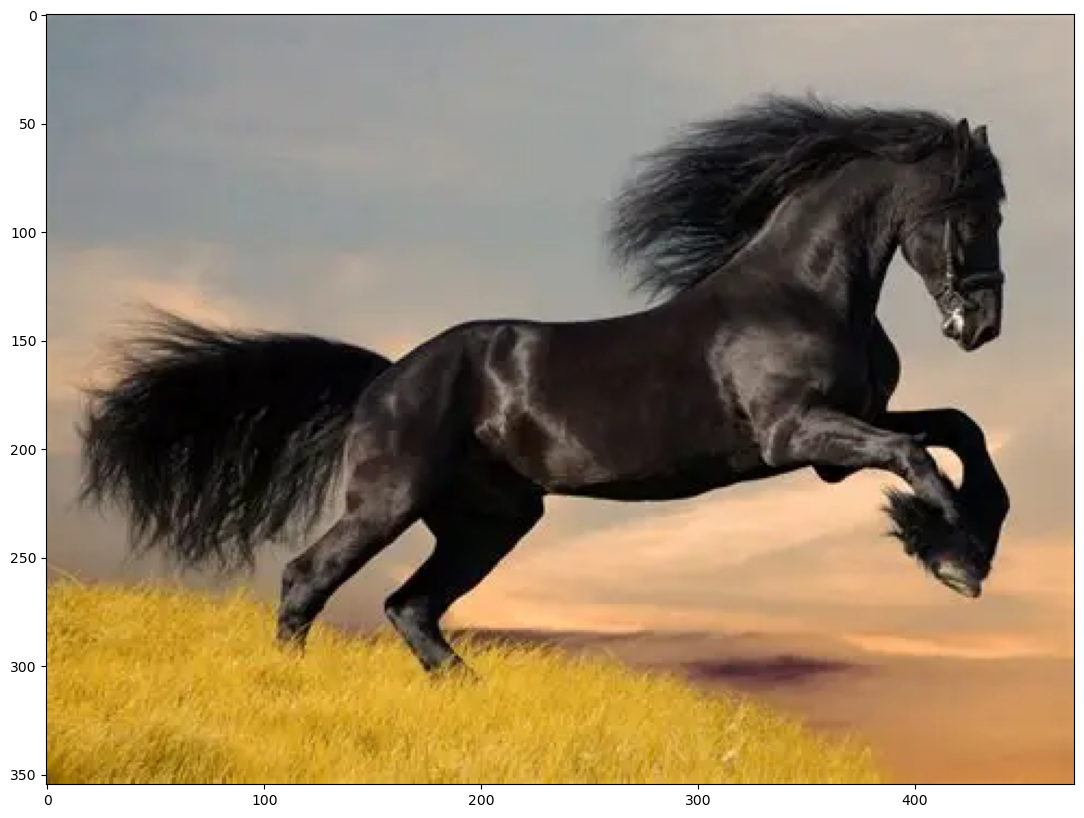

In [4]:
img = cv2.imread('OIP.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [12]:
img = img.astype(np.float32)

rows, cols, channels = img.shape
quantized = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        
        distances = np.linalg.norm(colors - pixel, axis=1)
        new_pixel = colors[np.argmin(distances)]  
        
        quantized[r, c, :] = new_pixel

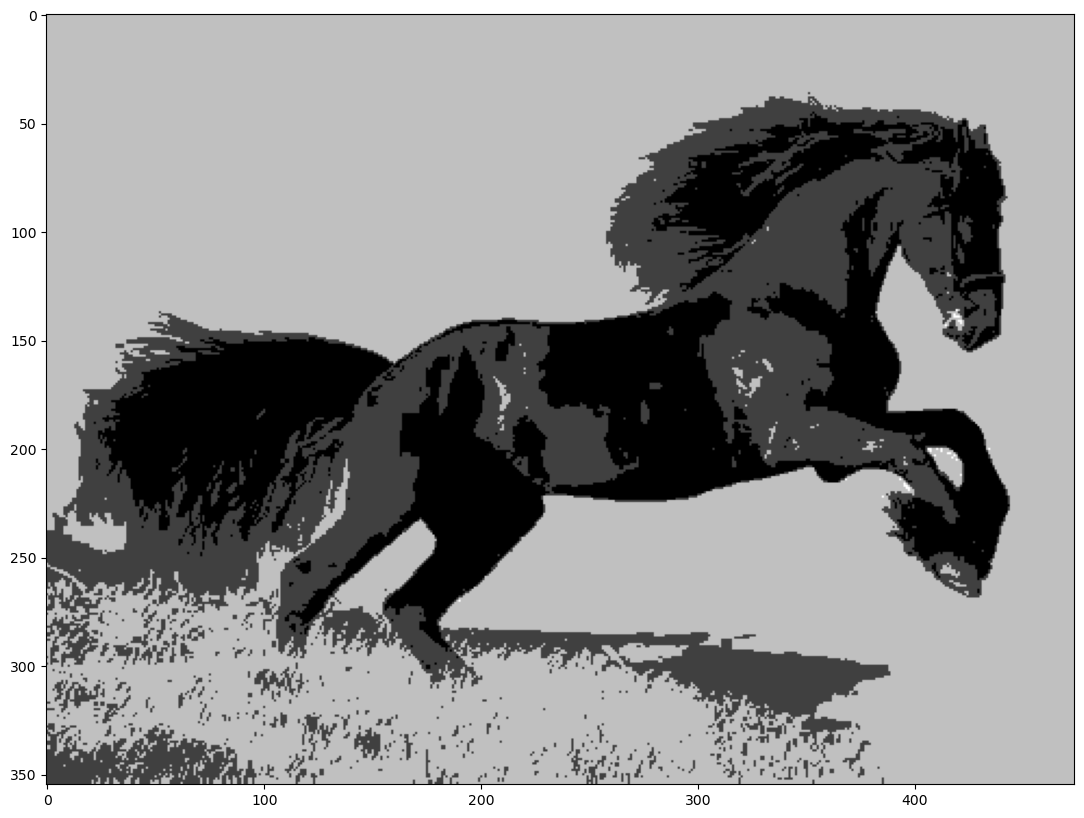

In [13]:
plt.imshow(quantized.astype(np.uint8))

In [14]:
avg_quant_error = np.mean(np.abs(img - quantized))
avg_quant_error

np.float32(34.639076)

In [15]:
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp[r, c, :]

        distances = np.linalg.norm(colors - pixel, axis=1)
        new_pixel = colors[np.argmin(distances)]       
        
        quant_error = pixel - new_pixel
        
        img_tmp[r, c+1, :]     += quant_error * 7/16
        img_tmp[r+1, c-1, :]   += quant_error * 3/16
        img_tmp[r+1, c, :]     += quant_error * 5/16
        img_tmp[r+1, c+1, :]   += quant_error * 1/16 
        
        dithering[r, c, :] = new_pixel

(<Axes: title={'center': 'Floyd-Steinberg Dithering'}>,
 Text(0.5, 1.0, 'Floyd-Steinberg Dithering'))

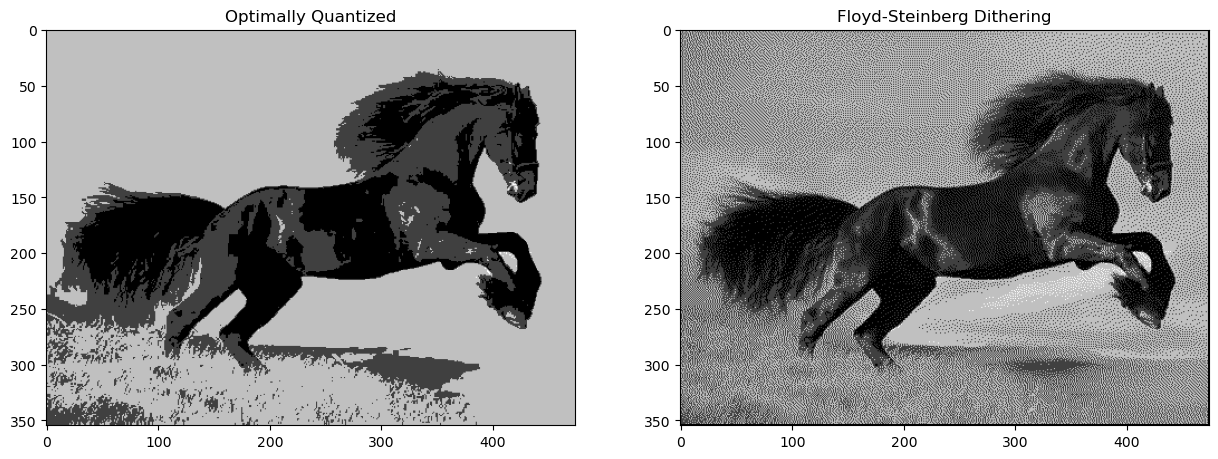

In [17]:
plt.subplot(121), plt.imshow(quantized.astype(np.uint8)), plt.title("Optimally Quantized")
plt.subplot(122), plt.imshow(dithering.astype(np.uint8)), plt.title("Floyd-Steinberg Dithering")

In [18]:
avg_dith_error = np.mean(np.abs(img - dithering))
avg_dith_error 

np.float32(44.549213)

In [ ]:
# У dithered изображения средняя квантовочная ошибка выше.
# Субъективно лучше выглядит dithered, создается иллюзия большего количества оттенков.

In [19]:
colors = np.array([[0,0,0],
                   [255,255,255]])

In [20]:
img = img.astype(np.float32)

rows, cols, channels = img.shape
quantized = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        
        distances = np.linalg.norm(colors - pixel, axis=1)
        new_pixel = colors[np.argmin(distances)]  
        
        quantized[r, c, :] = new_pixel

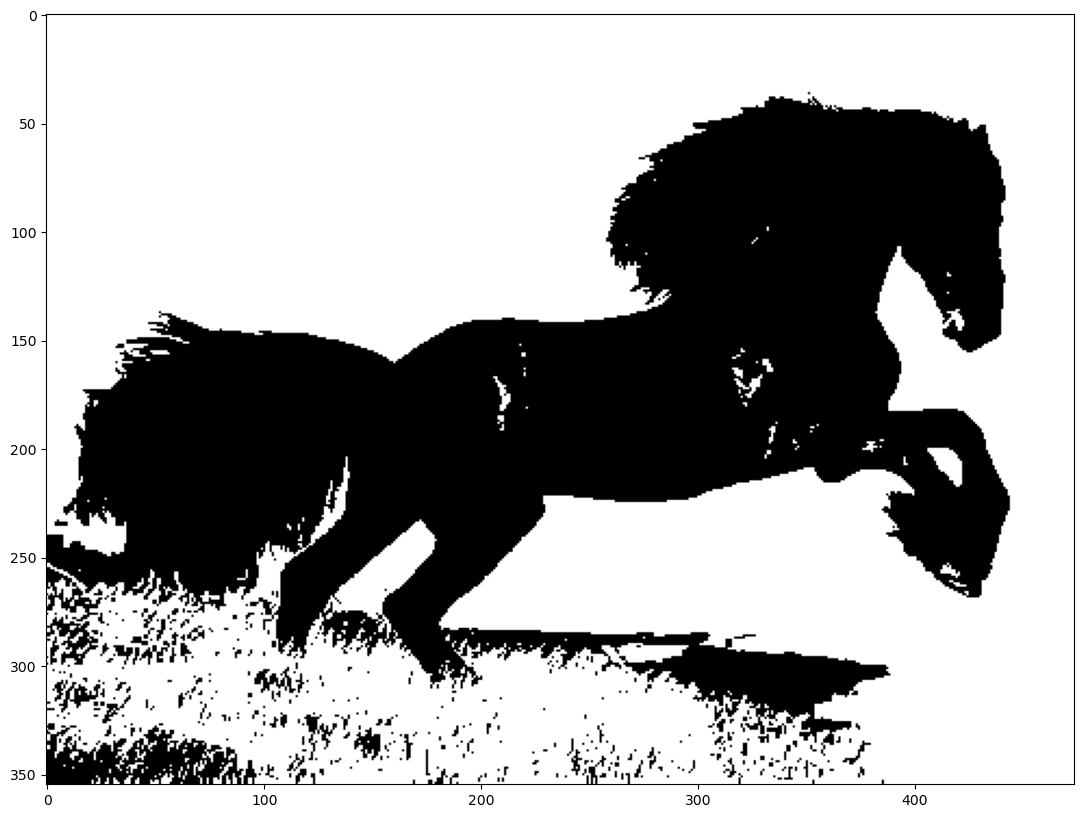

In [21]:
plt.imshow(quantized.astype(np.uint8))

In [22]:
avg_quant_error = np.mean(np.abs(img - quantized))
avg_quant_error

np.float32(78.8847)

In [23]:
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp[r, c, :]

        distances = np.linalg.norm(colors - pixel, axis=1)
        new_pixel = colors[np.argmin(distances)]       
        
        quant_error = pixel - new_pixel
        
        img_tmp[r, c+1, :]     += quant_error * 7/16
        img_tmp[r+1, c-1, :]   += quant_error * 3/16
        img_tmp[r+1, c, :]     += quant_error * 5/16
        img_tmp[r+1, c+1, :]   += quant_error * 1/16 
        
        dithering[r, c, :] = new_pixel

(<Axes: title={'center': 'Floyd-Steinberg Dithering'}>,
 Text(0.5, 1.0, 'Floyd-Steinberg Dithering'))

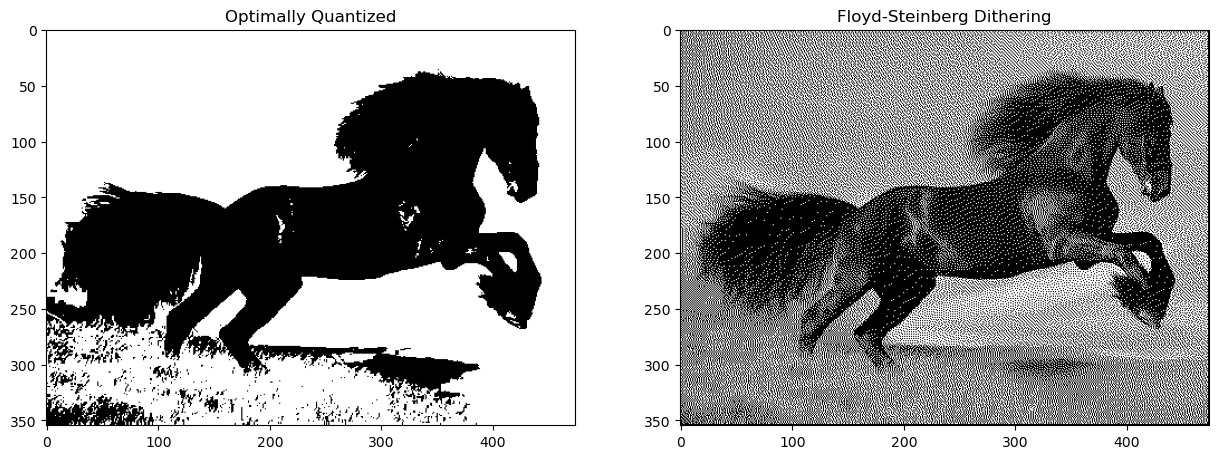

In [24]:
plt.subplot(121), plt.imshow(quantized.astype(np.uint8)), plt.title("Optimally Quantized")
plt.subplot(122), plt.imshow(dithering.astype(np.uint8)), plt.title("Floyd-Steinberg Dithering")

In [25]:
avg_dith_error = np.mean(np.abs(img - dithering))
avg_dith_error 

np.float32(99.092705)

In [44]:
from sklearn.cluster import KMeans
pixels = img.reshape(-1, 3)

k = 16

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)
colors = kmeans.cluster_centers_

In [50]:
img = img.astype(np.float32)

rows, cols, channels = img.shape
quantized = np.zeros_like(img)

for r in range(rows):
    for c in range(cols):
        pixel = img[r, c, :]
        distances = np.linalg.norm(colors - pixel, axis=1)
        new_pixel = colors[np.argmin(distances)]
        quantized[r, c, :] = new_pixel

(<matplotlib.image.AxesImage at 0x231f425ae90>, Text(0.5, 1.0, '16 colors'))

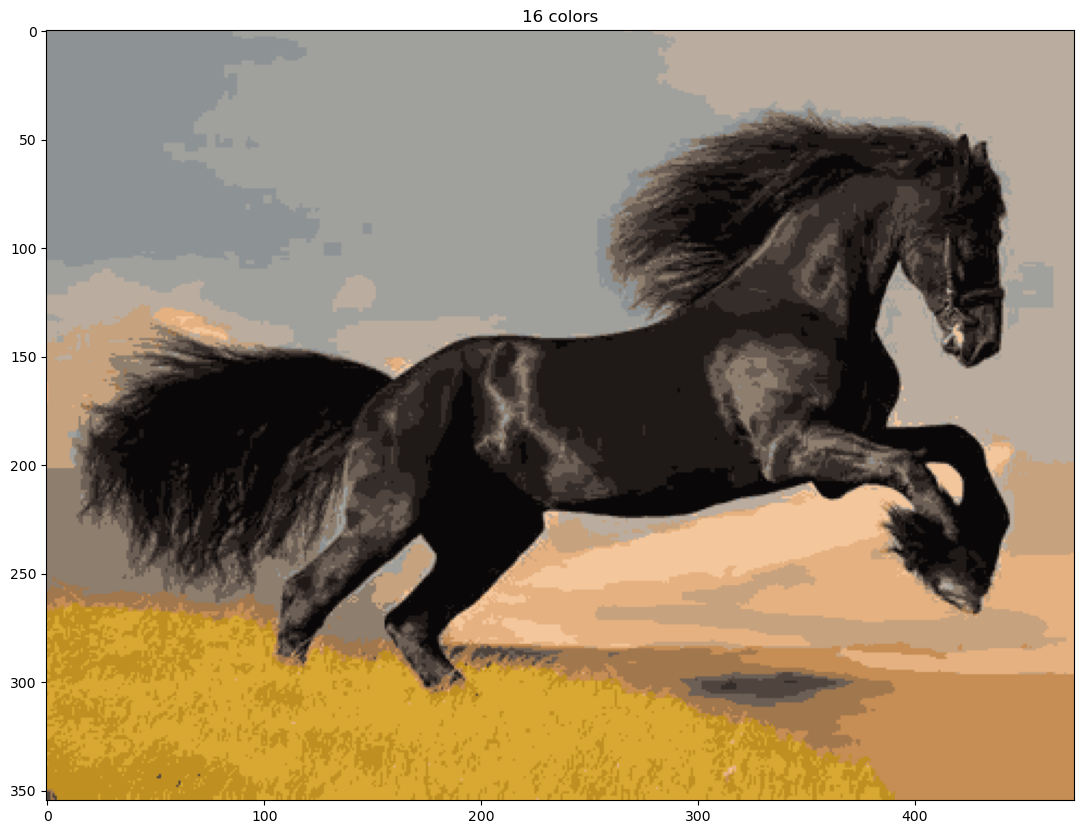

In [49]:
plt.imshow(quantized.astype(np.uint8)), plt.title(f"{k} colors")

In [47]:
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        pixel = img_tmp[r, c, :]

        distances = np.linalg.norm(colors - pixel, axis=1)
        new_pixel = colors[np.argmin(distances)]

        quant_error = pixel - new_pixel

        img_tmp[r, c+1, :]   += quant_error * 7/16
        img_tmp[r+1, c-1, :] += quant_error * 3/16
        img_tmp[r+1, c, :]   += quant_error * 5/16
        img_tmp[r+1, c+1, :] += quant_error * 1/16

        dithering[r, c, :] = new_pixel

(<matplotlib.image.AxesImage at 0x231f42cd450>,
 Text(0.5, 1.0, '16 colors + FS dithering'))

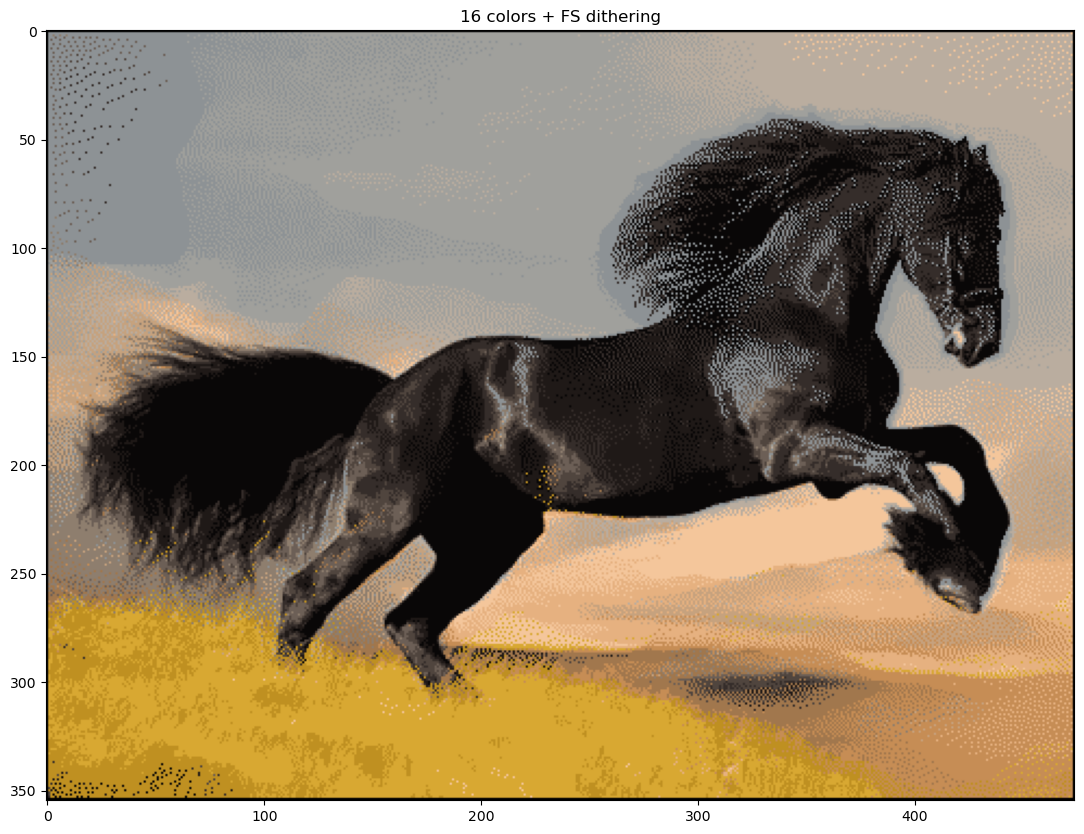

In [51]:
plt.imshow(dithering.astype(np.uint8)), plt.title(f"{k} colors + FS dithering")

In [ ]:
# Если использовать 16 цветов - картинка выглядит значительно лучше — цвета приближены к оригиналу.
# Если 32 цвета - разница с 16 уже не столь заметна, но градиенты становятся мягче.
# Если 256 цветов - почти неотличимо от оригинала.